In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

data = pd.read_csv('/content/Datasets_Project_Final - Final_sheet_Demo - Datasets_Project_Final - Final_sheet_Demo.csv')

y = data.iloc[:,-1].values
feature_names = [i for i in data.columns]
X = data.iloc[:,:-2]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(random_state=1458 , criterion='entropy',min_samples_leaf=6)
my_model.fit(train_X, train_y)

RandomForestClassifier(criterion='entropy', min_samples_leaf=6,
                       random_state=1458)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0).fit(train_X, train_y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors = 23, metric = 'minkowski', p = 1)
knn.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=23, p=1)

In [ ]:
data.head()

,Website_Score,Page_rank_score,Author_Score,Customer_ratings_Score,final score,Credible/not_credible
0,7.3,3.33,6.84,9.57,5.754,1
1,8.5,2.40,6.95,9.71,6.224,0
2,8.5,0.00,6.64,9.85,6.330,0
3,9.0,0.00,7.35,3.95,5.570,1
4,8.7,2.86,6.75,6.72,5.936,1


In [ ]:
data_for_prediction = val_X.iloc[1]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)


my_model.predict_proba(data_for_prediction_array)

array([[0.00654545, 0.99345455]])

In [ ]:
data_for_prediction2 = val_X.iloc[0:50]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array2 = data_for_prediction2.values.reshape(50, -50)


my_model.predict_proba(data_for_prediction_array2)

array([[0.01250112, 0.98749888],
       [0.00654545, 0.99345455],
       [0.0655085 , 0.9344915 ],
       [0.5020521 , 0.4979479 ],
       [0.02168506, 0.97831494],
       [0.03910922, 0.96089078],
       [0.75071218, 0.24928782],
       [0.33026002, 0.66973998],
       [0.00285714, 0.99714286],
       [0.00285714, 0.99714286],
       [0.01139776, 0.98860224],
       [0.00634921, 0.99365079],
       [0.06275169, 0.93724831],
       [0.09019395, 0.90980605],
       [0.00871429, 0.99128571],
       [0.00230769, 0.99769231],
       [0.06126879, 0.93873121],
       [0.01063636, 0.98936364],
       [0.88062678, 0.11937322],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.04588505, 0.95411495],
       [0.46479687, 0.53520313],
       [0.3348349 , 0.6651651 ],
       [0.01107082, 0.98892918],
       [0.        , 1.        ],
       [0.3872399 , 0.6127601 ],
       [0.00349206, 0.99650794],
       [0.54291174, 0.45708826],
       [0.02039557, 0.97960443],
       [0.

In [ ]:
!pip install shap
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

##OBSERVATION 1


###Tree explainer




In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

DimensionError: Length of features is not equal to the length of shap_values!

In [ ]:
shap_values = explainer.shap_values(data_for_prediction2)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction2)

IndexError: index 2 is out of bounds for axis 0 with size 2

###Kernal Explainer


In [ ]:
shap.initjs()
k_explainer = shap.KernelExplainer(my_model.predict_proba, train_X)
k_shap_values = k_explainer.shap_values(data_for_prediction)
shap.force_plot(k_explainer.expected_value[1], k_shap_values[1], data_for_prediction )

DimensionError: Length of features is not equal to the length of shap_values!

###Waterfall model


In [ ]:
import xgboost
from xgboost import XGBClassifier



model = xgboost.XGBClassifier()
model.fit(train_X, train_y)




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

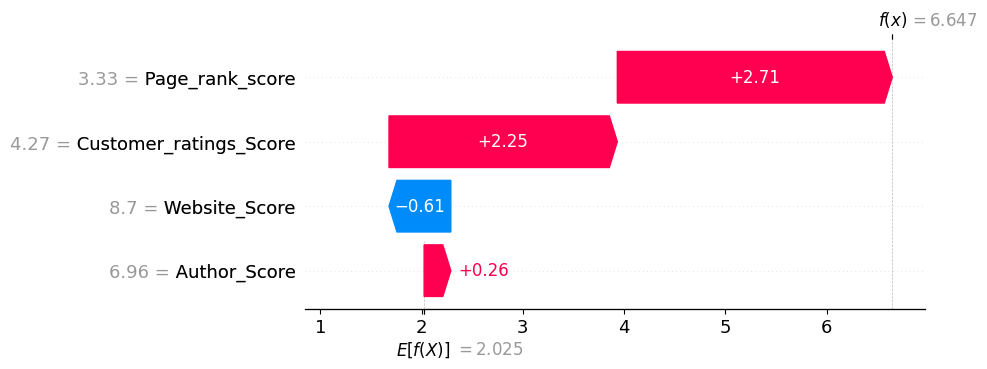

In [ ]:
explainer2 = shap.Explainer(model)
shap_values2 = explainer2(X)

shap.plots.waterfall(shap_values2[39])

In [ ]:
shap.initjs()
shap.plots.force(shap_values2[39])

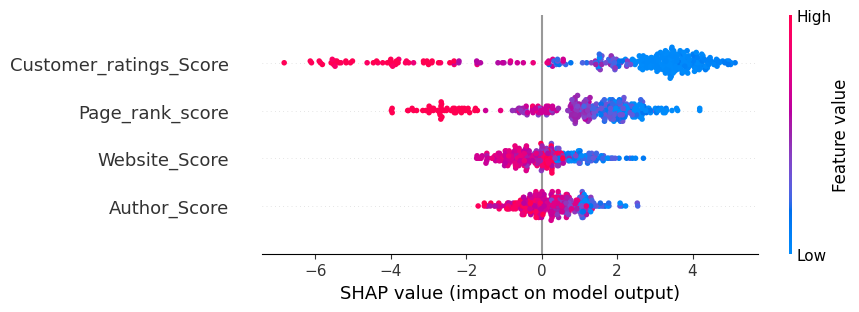

In [ ]:
shap.plots.beeswarm(shap_values2)

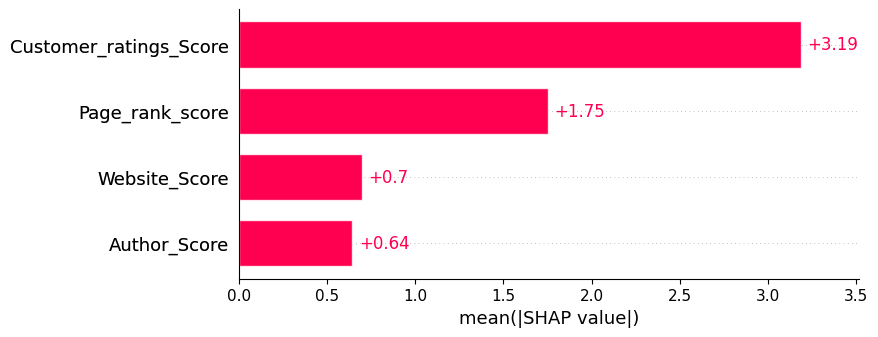

In [ ]:
shap.plots.bar(shap_values2)

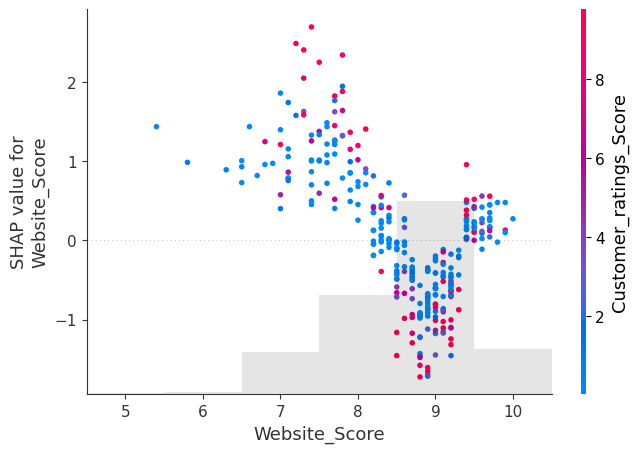

In [ ]:
shap.plots.scatter(shap_values2[:,0], color=shap_values2)

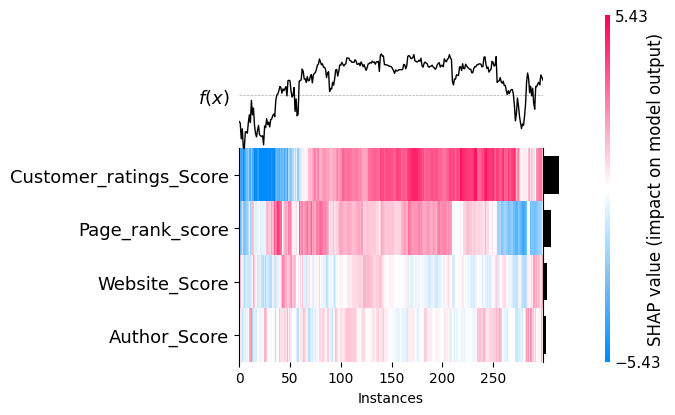

In [ ]:
shap.plots.heatmap(shap_values2[:300])

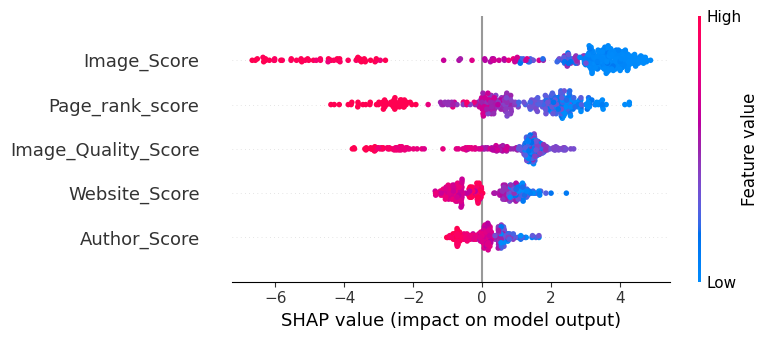

In [ ]:
shap.summary_plot(shap_values2, X)

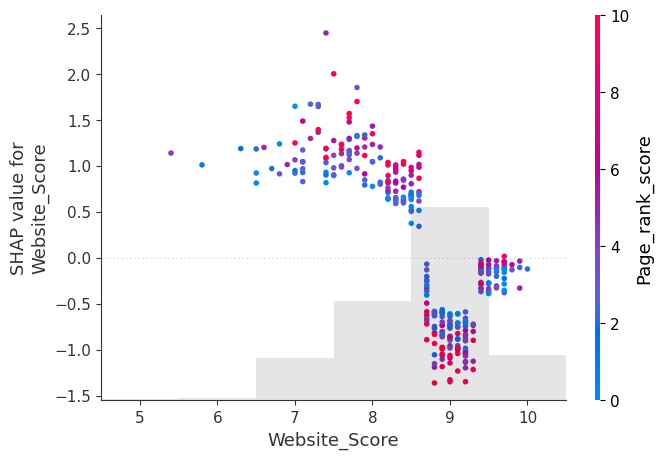

In [ ]:
shap.plots.scatter(shap_values2[:,"Website_Score"], color=shap_values2)

The expected value is  2.0248585


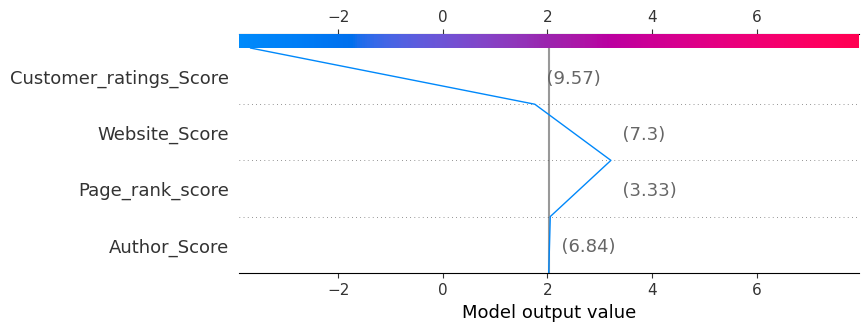

In [ ]:
expected_value = explainer2.expected_value
print("The expected value is ", expected_value)
shap_values2 = explainer2.shap_values(X)[1]
shap.decision_plot(expected_value, shap_values2, X)

The expected value is  2.0248585


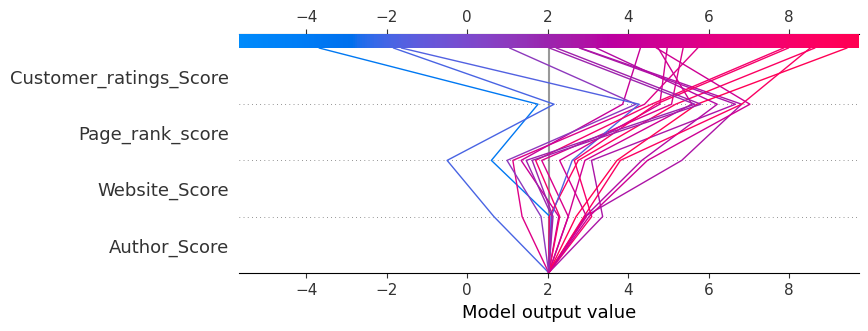

In [ ]:
expected_value = explainer2.expected_value
print("The expected value is ", expected_value)
shap_values2 = explainer2.shap_values(X)[0:20]
shap.decision_plot(expected_value, shap_values2, X)

In [ ]:
shap.decision_plot(explainer2.expected_value(), shap_values2, X)

TypeError: 'numpy.float32' object is not callable

#Random Forest


In [ ]:
pred_rf = my_model.predict(val_X)
rf_c = confusion_matrix(val_y,pred_rf)
print(rf_c)

[[ 4  5]
 [ 0 71]]


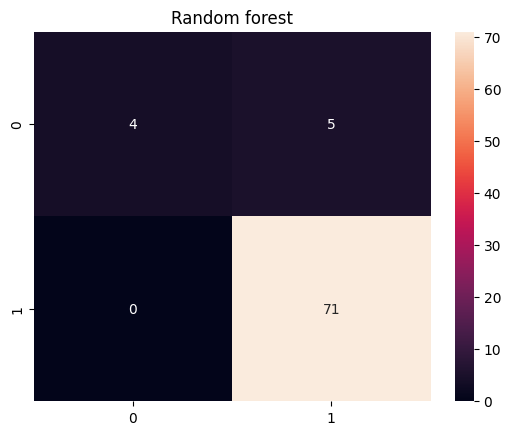

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(rf_c, annot=True, fmt='g')
plt.title(f'Random forest')
plt.show()

In [ ]:
tp_rf=rf_c[1,1]
fp_rf=rf_c[0,1]
fn_rf=rf_c[1,0]
tn_rf=rf_c[0,0]

In [ ]:
accuracy_rf = (tp_rf+tn_rf)/(tp_rf+tn_rf+fn_rf+fp_rf)
print(accuracy_rf)

0.9375


In [ ]:
# Precision for random forest
# tp / (tp + fp)

pre_rf = (tp_rf/(tp_rf + fp_rf))
print(pre_rf)

0.9342105263157895


In [ ]:
# Recall for random forest
# tp / (tp + fn)

rec_rf = (tp_rf/(tp_rf + fn_rf))
print(rec_rf)

1.0


In [ ]:
#random forest
# F1  = 2 * (precision * recall) / (precision + recall)

f1_rf = (2 * (pre_rf * rec_rf) / (pre_rf + rec_rf))
print(f1_rf)

0.9659863945578232


#Decision tree

In [ ]:
pred_dt = dt.predict(val_X)
dt_c = confusion_matrix(val_y,pred_dt)
print(dt_c)

[[ 5  4]
 [ 2 69]]


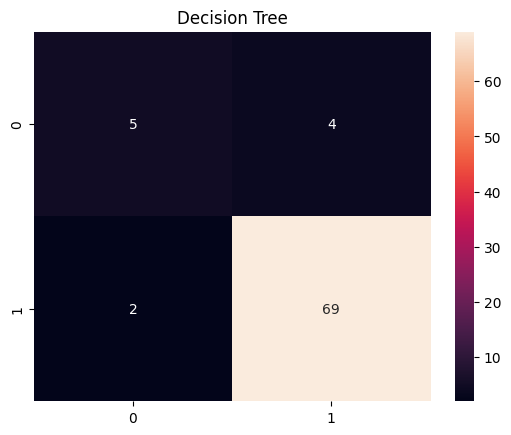

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(dt_c, annot=True, fmt='g')
plt.title(f'Decision Tree')
plt.show()

In [ ]:
tp_dt=dt_c[1,1]
fp_dt=dt_c[0,1]
fn_dt=dt_c[1,0]
tn_dt=dt_c[0,0]

In [ ]:
accuracy_dt = (tp_dt+tn_dt)/(tp_dt+tn_dt+fn_dt+fp_dt)
print(accuracy_dt)

0.925


In [ ]:
# Precision for random forest
# tp / (tp + fp)

pre_dt = (tp_dt/(tp_dt + fp_dt))
print(pre_dt)

0.9452054794520548


In [ ]:
# Recall for random forest
# tp / (tp + fn)

rec_dt = (tp_dt/(tp_dt + fn_dt))
print(rec_dt)

0.971830985915493


In [ ]:
#random forest
# F1  = 2 * (precision * recall) / (precision + recall)

f1_dt = (2 * (pre_dt * rec_dt) / (pre_dt + rec_dt))
print(f1_dt)

0.9583333333333334



#Knn

In [ ]:
pred_knn = knn.predict(val_X)
knn_c = confusion_matrix(val_y,pred_knn)
print(knn_c)

[[ 4  5]
 [ 2 69]]


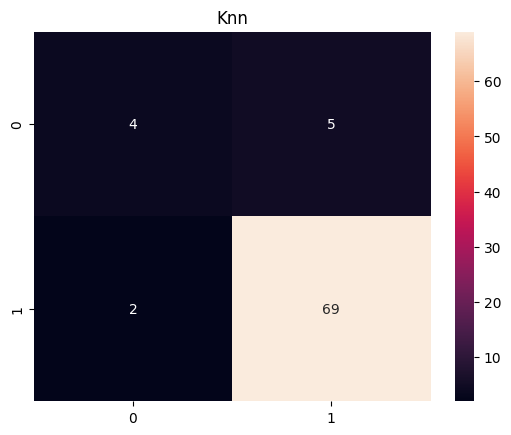

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(knn_c, annot=True, fmt='g')
plt.title(f'Knn')
plt.show()

In [ ]:
tp_knn=knn_c[1,1]
fp_knn=knn_c[0,1]
fn_knn=knn_c[1,0]
tn_knn=knn_c[0,0]

In [ ]:
accuracy_knn = (tp_knn+tn_knn)/(tp_knn+tn_knn+fn_knn+fp_knn)
print(accuracy_knn)

0.9125


In [ ]:
# Precision for random forest
# tp / (tp + fp)

pre_knn = (tp_knn/(tp_knn + fp_knn))
print(pre_knn)

0.9324324324324325


In [ ]:
# Recall for random forest
# tp / (tp + fn)

rec_knn = (tp_knn/(tp_knn + fn_knn))
print(rec_knn)

0.971830985915493


In [ ]:
#random forest
# F1  = 2 * (precision * recall) / (precision + recall)

f1_knn = (2 * (pre_knn * rec_knn) / (pre_knn + rec_knn))
print(f1_knn)

0.9517241379310345



#Xgboost

In [ ]:
pred_xg = model.predict(val_X)
xg_c = confusion_matrix(val_y,pred_xg)
print(xg_c)

[[ 7  2]
 [ 0 71]]


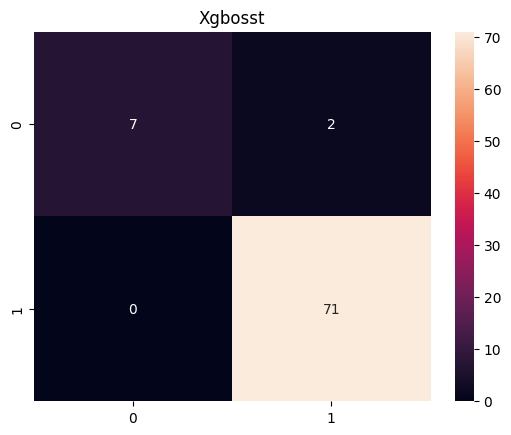

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(xg_c, annot=True, fmt='g')
plt.title(f'Xgbosst')
plt.show()

In [ ]:
tp_xg=xg_c[1,1]
fp_xg=xg_c[0,1]
fn_xg=xg_c[1,0]
tn_xg=xg_c[0,0]

In [ ]:
accuracy_xg = (tp_xg+tn_xg)/(tp_xg+tn_xg+fn_xg+fp_xg)
print(accuracy_xg)

0.975


In [ ]:
# Precision for random forest
# tp / (tp + fp)

pre_xg = (tp_xg/(tp_xg + fp_xg))
print(pre_xg)

0.9726027397260274


In [ ]:
# Recall for random forest
# tp / (tp + fn)

rec_xg = (tp_xg/(tp_xg + fn_xg))
print(rec_xg)

1.0


In [ ]:
#random forest
# F1  = 2 * (precision * recall) / (precision + recall)

f1_xg = (2 * (pre_xg * rec_xg) / (pre_xg + rec_xg))
print(f1_xg)

0.9861111111111112


#EDA


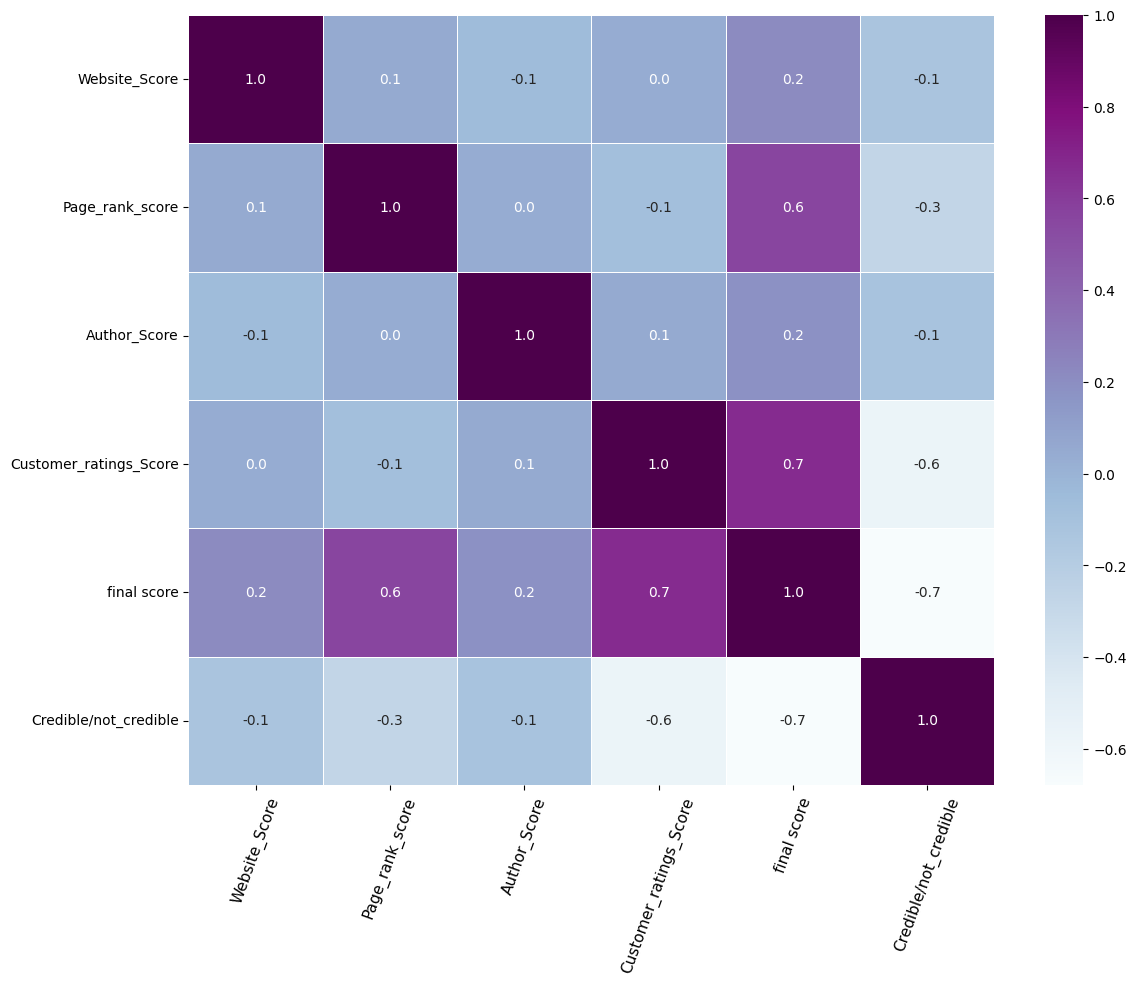

In [ ]:
f,ax = plt.subplots(figsize=(13,10))
cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
sns.heatmap(data.corr(),annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap="BuPu")
plt.xticks(fontsize=11,rotation=70)
plt.show()

In [ ]:
data = data.rename(columns = {'FAKE/NOTFAKE': 'Fake_not_fake'}, inplace = False)

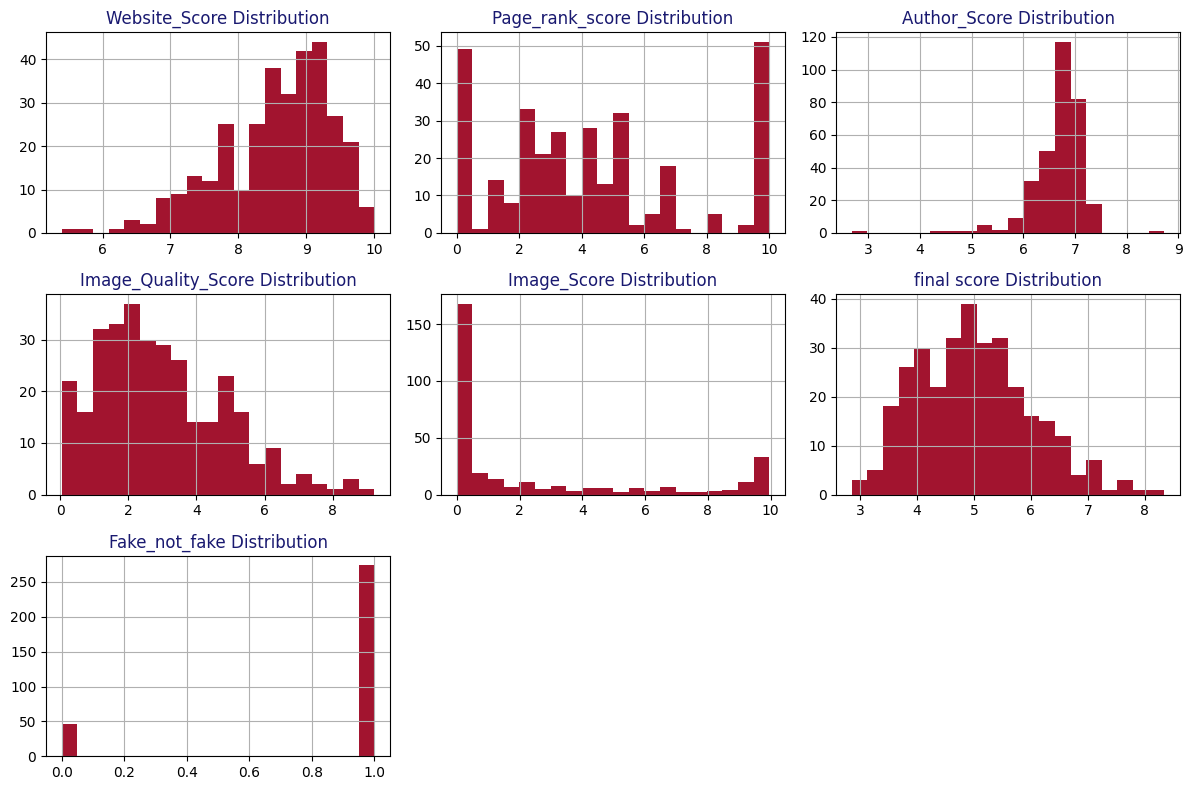

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(12,8))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='#A2142F')
        ax.set_title(feature+" Distribution",color='midnightblue')

    fig.tight_layout()
    plt.show()
draw_histograms(data,data.columns,3,3)

In [ ]:
list1=[['Random Forest',accuracy_rf,pre_rf,rec_rf,f1_rf],['Decision Tree',accuracy_dt,pre_dt,rec_dt,f1_dt],['KNN',accuracy_knn ,pre_knn,rec_knn,f1_knn],['Xgboost',accuracy_xg, pre_xg,rec_xg,f1_xg]]
Comparision = pd.DataFrame(list1)
Comparision.columns = ['Classification Modal','Accuracy','Precision','Recall','F1-score']
Comparision

,Classification Modal,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.9375,0.934211,1.000000,0.965986
1,Decision Tree,0.9250,0.945205,0.971831,0.958333
2,KNN,0.9125,0.932432,0.971831,0.951724
3,Xgboost,0.9750,0.972603,1.000000,0.986111


In [ ]:
result.to_csv("result.csv")